In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import difflib
import math
import geopandas
import matplotlib.pyplot as plt
import sklearn
from pandas.io.json import  json_normalize
from shapely.geometry import Polygon, LineString, Point
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geoplot
import geoplot.crs as gcrs


In [2]:
MATH_PI = 0.017453292519943295
EARTH_RADIUS_BY_2 = 12742000 # in metre

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
def return_near_by_structures(lat, lon, radius, input_data):
    
    input_data['distance'] = input_data.apply(lambda row: distance_between_2_points(lat, lon, row['lat'], row['lon']), axis=1)
        
    input_data = input_data[input_data['distance'] < radius].reset_index()
    
    return input_data


In [5]:
def distance_between_2_points(lat1, lon1, lat2, lon2):
    c = np.cos
    a = 0.5 - c((lat2 - lat1) * MATH_PI)/2 + c(lat1 * MATH_PI) * c(lat2 * MATH_PI) * (1 - c((lon2 - lon1) * MATH_PI)) / 2
    
    return EARTH_RADIUS_BY_2 * np.arcsin(np.sqrt(a))


In [6]:
def return_near_by_structures_boundary(lat, lon, neighbourhood_name, input_data):
    
    point_list_from_input_data = [Point(xy) for xy in zip(input_data.lon, input_data.lat)]
    
    points_df = geopandas.GeoDataFrame(input_data, geometry = point_list_from_input_data)
    
    
    my_point = Point(lon, lat)
    
    neighbourhood_boundary = yvr_boundary[yvr_boundary['mapid'] == neighbourhood_name].geometry.values[0]
    
    if neighbourhood_boundary.contains(my_point):
        
        res_points = points_df[points_df.geometry.within(neighbourhood_boundary)].reset_index()
        
        return res_points
    
    else:
        return None


In [7]:
hk_boundary = geopandas.read_file('Hong_Kong_18_Districts.geojson')

In [8]:
hk_boundary

,OBJECTID,ID,CNAME,CNAME_S,ENAME,SHAPE_Length,SHAPE_Area,geometry
0,1,1.0,黃大仙區,黄大仙区,WONG TAI SIN,0.156228,0.000816,"MULTIPOLYGON (((114.17942 22.34905, 114.17946 ..."
1,2,6.0,九龍城區,九龙城区,KOWLOON CITY,0.273668,0.000884,"MULTIPOLYGON (((114.17700 22.34904, 114.17702 ..."
2,3,7.0,觀塘區,观塘区,KWUN TONG,0.220475,0.000987,"MULTIPOLYGON (((114.24371 22.28620, 114.24370 ..."
3,4,8.0,西貢區,西贡区,SAI KUNG,3.154700,0.011963,"MULTIPOLYGON (((114.22112 22.35318, 114.22114 ..."
4,5,11.0,北區,北区,NORTH,1.671697,0.012070,"MULTIPOLYGON (((114.33576 22.51003, 114.33576 ..."
5,6,13.0,中西區,中西区,CENTRAL & WESTERN,0.231894,0.001091,"MULTIPOLYGON (((114.14562 22.29045, 114.14990 ..."
6,7,14.0,灣仔區,湾仔区,WAN CHAI,0.168909,0.000867,"MULTIPOLYGON (((114.20012 22.27387, 114.20047 ..."
7,8,15.0,東區,东区,EASTERN,0.313439,0.001631,"MULTIPOLYGON (((114.24738 22.25339, 114.24733 ..."
8,9,17.0,屯門區,屯门区,TUEN MUN,0.859430,0.007402,"MULTIPOLYGON (((113.93745 22.42638, 113.93765 ..."
9,10,18.0,元朗區,元朗区,YUEN LONG,0.790774,0.012297,"MULTIPOLYGON (((113.93832 22.42696, 113.93843 ..."


<GeoAxesSubplot:>

/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


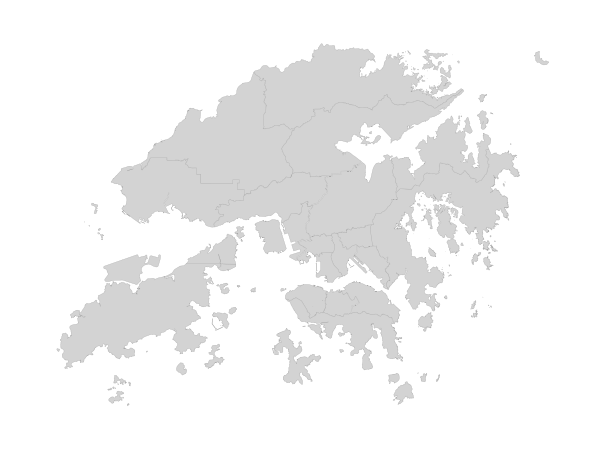

In [9]:
geoplot.polyplot(hk_boundary, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

In [1]:
population = pd.read_csv("population.csv")

NameError: name 'pd' is not defined

In [10]:
hk_population_by_district =  pd.read_excel('hk_population_by_district.xlsx')

In [11]:
hk_population_by_district

,Central and Western,Wan Chai (1),Eastern (1),Southern,Yau Tsim Mong,Sham Shui Po,Kowloon City,Wong Tai Sin,Kwun Tong,Kwai Tsing,Tsuen Wan,Tuen Mun,Yuen Long,North,Tai Po,Sha Tin,Sai Kung,Islands
0,1530,1277,4195,2008,2104,3042,3010,3142,5485,4296,2169,3383,3161,1699,1883,4765,2592,916
1,1083,894,3084,1421,1561,2120,2194,2397,4210,3468,1636,2615,2550,1298,1498,3614,2091,731
2,1004,865,2984,1348,1424,2230,2247,2490,4265,3474,1680,2428,2372,1333,1216,3412,2037,735
3,1042,840,3039,1383,1367,2240,2389,2512,4399,3410,1669,2306,2332,1231,1217,3445,1858,713
4,953,780,2996,1181,1433,2075,2073,2175,3875,2822,1431,1993,1981,944,1127,2946,1737,557
5,905,812,2774,1275,1290,1927,2042,2154,3789,2636,1313,1891,1876,1071,1026,2791,1732,505
6,1128,943,3112,1292,1343,2080,2101,2398,3918,2873,1449,1973,1981,948,1099,3072,1626,546
7,997,1026,2949,1373,1331,2109,2211,2457,3918,2651,1384,1849,2009,1102,1096,2901,1607,596
8,1059,949,3069,1467,1457,2203,2137,2527,3914,2777,1470,1798,2002,1193,1144,2921,1548,543
9,1029,894,2893,1388,1329,2166,2077,2416,3666,2572,1296,1431,1758,1085,1073,2683,1525,456


In [12]:
hk_population_by_district.loc['Total'] = hk_population_by_district.sum(axis=0)

In [13]:
hk_population_by_district = hk_population_by_district.loc['Total']

In [14]:
hk_population_by_district = pd.DataFrame(hk_population_by_district).transpose()

In [15]:
hk_population_by_district.columns.values[1] = 'Wan Chai'
hk_population_by_district.columns.values[2] = 'Eastern'

In [16]:
hk_population_by_district

,Central and Western,Wan Chai,Eastern,Southern,Yau Tsim Mong,Sham Shui Po,Kowloon City,Wong Tai Sin,Kwun Tong,Kwai Tsing,Tsuen Wan,Tuen Mun,Yuen Long,North,Tai Po,Sha Tin,Sai Kung,Islands
Total,19285,16282,53025,24854,23860,38071,37814,43079,66260,47032,24420,31716,34711,19706,20185,50674,27774,9771


In [17]:
shopping_ceters = geopandas.read_file('Housing_Authority_Shopping_Centres_in_Hong_Kong.geojson')

In [18]:
community = geopandas.read_file('Community_Halls_and_Community_Centres_in_Hong_Kong.geojson')
population_by_age = geopandas.read_file("Hong_Kong_Population_Distribution_by_Age_in_2021.geojson")

<GeoAxesSubplot:>

/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


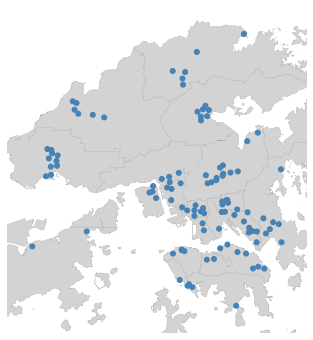

In [19]:
ax = geoplot.polyplot(population_by_age, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3)
geoplot.pointplot(community, ax = ax)


In [20]:
community.geometry


0      POINT Z (114.20081 22.29283 0.00000)
1      POINT Z (114.00204 22.46308 0.00000)
2      POINT Z (114.00438 22.45014 0.00000)
3      POINT Z (113.99946 22.45497 0.00000)
4      POINT Z (114.02348 22.44894 0.00000)
                       ...                 
103    POINT Z (114.17638 22.45466 0.00000)
104    POINT Z (114.16607 22.44218 0.00000)
105    POINT Z (114.16857 22.45555 0.00000)
106    POINT Z (114.17420 22.44730 0.00000)
107    POINT Z (114.01575 22.30850 0.00000)
Name: geometry, Length: 108, dtype: geometry

In [21]:
community.District.unique()

array(['EASTERN', 'YUEN LONG', 'KWUN TONG', 'SHAM SHUI PO', 'WAN CHAI',
       'SHA TIN', 'KOWLOON CITY', 'WONG TAI SIN', 'CENTRAL AND WESTERN',
       'NORTH', 'TUEN MUN', 'SAI KUNG', 'TSUEN WAN', 'SOUTHERN',
       'ISLANDS', 'KWAI TSING', 'TAI PO', 'YAU TSIM MONG'], dtype=object)

In [22]:
# Sepeparate community center points based on its districts
eastern = community.loc[community['District']=='EASTERN']
yuenlong = community.loc[community['District'] == 'YUEN LONG']
wanchai = community.loc[community['District'] == 'WAN CHAI']
shatin = community.loc[community['District'] == 'SHA TIN']
CandW = community.loc[community['District'] == 'CENTRAL AND WESTERN']
north = community.loc[community['District'] == 'NORTH']
saikung = community.loc[community['District'] == 'SAI KUNG']
tsuenwan = community.loc[community['District'] == 'TSUEN WAN']
south = community.loc[community['District'] == 'SOUTHERN']
island = community.loc[community['District'] == 'ISLANDS']
kwitsing = community.loc[community['District'] == 'KWAI TSING']
taipo = community.loc[community['District'] == 'TAIPO']
yautm = community.loc[community['District'] == 'YAU TSIM MONG']

In [23]:
yautm

,OBJECTID,GMID,Dataset,Facility_Name,Address,數據集,設施名稱,地址,District,地區,...,電郵地址,Website,網頁,Remarks,備註,Northing,Easting,Latitude,Longitude,geometry
71,72,sF72PY5u4S,Community Halls & Community Centres,Mong Kok Community Hall,"L2 Mong Kok Complex, \n \n 557 Shanghai Street...",社區會堂及社區中心,旺角社區會堂,九龍旺角上海街 557號\n \n 旺角綜合大樓二樓,YAU TSIM MONG,油尖旺,...,N.A.,N.A.,N.A.,N.A.,N.A.,819927,835364,22.31834,114.16810,POINT Z (114.16810 22.31834 0.00000)
86,87,l1CAzX4FTY,Community Halls & Community Centres,Henry G. Leong Yaumatei Community Centre,"60 Public Square Street, Yau Ma Tei, Kowloon",社區會堂及社區中心,梁顯利油麻地社區中心,九龍油麻地眾坊街60號,YAU TSIM MONG,油尖旺,...,N.A.,N.A.,N.A.,N.A.,N.A.,818994,835543,22.30992,114.16984,POINT Z (114.16984 22.30992 0.00000)


In [24]:
yautm.iloc[0].Latitude

22.31834

In [25]:
#yautm_rf_point 

distance_between_2_points(yautm.iloc[0].Latitude, yautm.iloc[0].Longitude, yautm.iloc[1].Latitude, yautm.iloc[1].Longitude)

953.2171067287996

In [26]:
hk_boundary

,OBJECTID,ID,CNAME,CNAME_S,ENAME,SHAPE_Length,SHAPE_Area,geometry
0,1,1.0,黃大仙區,黄大仙区,WONG TAI SIN,0.156228,0.000816,"MULTIPOLYGON (((114.17942 22.34905, 114.17946 ..."
1,2,6.0,九龍城區,九龙城区,KOWLOON CITY,0.273668,0.000884,"MULTIPOLYGON (((114.17700 22.34904, 114.17702 ..."
2,3,7.0,觀塘區,观塘区,KWUN TONG,0.220475,0.000987,"MULTIPOLYGON (((114.24371 22.28620, 114.24370 ..."
3,4,8.0,西貢區,西贡区,SAI KUNG,3.154700,0.011963,"MULTIPOLYGON (((114.22112 22.35318, 114.22114 ..."
4,5,11.0,北區,北区,NORTH,1.671697,0.012070,"MULTIPOLYGON (((114.33576 22.51003, 114.33576 ..."
5,6,13.0,中西區,中西区,CENTRAL & WESTERN,0.231894,0.001091,"MULTIPOLYGON (((114.14562 22.29045, 114.14990 ..."
6,7,14.0,灣仔區,湾仔区,WAN CHAI,0.168909,0.000867,"MULTIPOLYGON (((114.20012 22.27387, 114.20047 ..."
7,8,15.0,東區,东区,EASTERN,0.313439,0.001631,"MULTIPOLYGON (((114.24738 22.25339, 114.24733 ..."
8,9,17.0,屯門區,屯门区,TUEN MUN,0.859430,0.007402,"MULTIPOLYGON (((113.93745 22.42638, 113.93765 ..."
9,10,18.0,元朗區,元朗区,YUEN LONG,0.790774,0.012297,"MULTIPOLYGON (((113.93832 22.42696, 113.93843 ..."


In [27]:
# Generate random points within a given boundary
# Give district ID (index + 1) and number of points,  return a list of randomly generated points.

def get_random_points_in_district(district_ID, num_point):
    
    boundary = hk_boundary[hk_boundary['OBJECTID'] == district_ID].geometry.values[0]
    
    min_x, min_y, max_x, max_y = boundary.bounds
    
    x = np.random.uniform(min_x, max_x, num_point)
    y = np.random.uniform(min_y, max_y, num_point)
    
    points = geopandas.GeoSeries(geopandas.points_from_xy(x, y))
    
    points = points[points.within(boundary)]
    
    return points


In [28]:
test1 = get_random_points_in_district(9, 1000)

<AxesSubplot:>

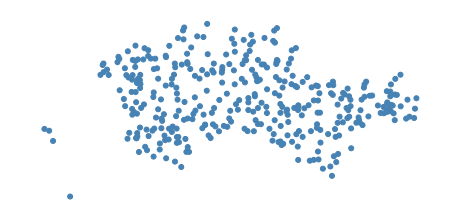

In [29]:
geoplot.pointplot(test1)

<GeoAxesSubplot:>

/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/conda/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


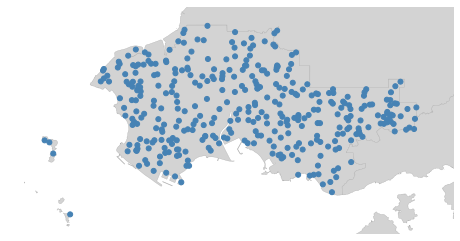

In [30]:
ax1 = geoplot.polyplot(population_by_age, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3)
geoplot.pointplot(test1, ax = ax1)

In [31]:
0,1,2,5,6,12,13,14

(0, 1, 2, 5, 6, 12, 13, 14)

In [32]:
3,4,7,8,9,10,11,15,16,17

(3, 4, 7, 8, 9, 10, 11, 15, 16, 17)

In [33]:
# 3- saikung

saikung

,OBJECTID,GMID,Dataset,Facility_Name,Address,數據集,設施名稱,地址,District,地區,...,電郵地址,Website,網頁,Remarks,備註,Northing,Easting,Latitude,Longitude,geometry
33,34,bvsySFidp2,Community Halls & Community Centres,Hang Hau Community Hall,"G/F., Sai Kung Tseung Kwan O Government Comple...",社區會堂及社區中心,坑口社區會堂,新界將軍澳坑口培成路38號西貢將軍澳政府綜合大樓地下,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,819820,845703,22.31735,114.26845,POINT Z (114.26845 22.31735 0.00000)
34,35,ZoAmYFprcv,Community Halls & Community Centres,Kin Choi Community Hall,"6/F, Choi Ming Shopping Centre Extension, Kin ...",社區會堂及社區中心,健彩社區會堂,新界將軍澳健明邨彩明商場擴展部份六樓,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,818564,843950,22.30602,114.25143,POINT Z (114.25143 22.30602 0.00000)
35,36,cu6bdspOaL,Community Halls & Community Centres,Sheung Tak Community Hall,"Sheung Mei House, ,Sheung Tak Estate, ,Tseung ...",社區會堂及社區中心,尚德社區會堂,新界將軍澳尚德尚美樓,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,819144,844485,22.31125,114.25662,POINT Z (114.25662 22.31125 0.00000)
36,37,09lqOtcjWa,Community Halls & Community Centres,Lohas Park Community Hall,"The Capitol, LOHAS Park, Tseung Kwan O",社區會堂及社區中心,康城社區會堂,新界將軍澳日出康城首都,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,817398,846065,22.29548,114.27195,POINT Z (114.27195 22.29548 0.00000)
37,38,PxIeaZaqCA,Community Halls & Community Centres,Tsui Lam Community Hall,"Tsui Lam Estate, ,Tseung Kwan O, New Territories",社區會堂及社區中心,翠林社區會堂,新界將軍澳翠林邨,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,820596,843610,22.32437,114.24814,POINT Z (114.24814 22.32437 0.00000)
38,39,W7KgY6qSvB,Community Halls & Community Centres,King Lam Neighbourhood Community Centre,"King Lam Estate, Tseung Kwan O, New Territories",社區會堂及社區中心,景林鄰里社區中心,新界將軍澳景林邨,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,820071,844933,22.31962,114.26098,POINT Z (114.26098 22.31962 0.00000)
39,40,ozmRlKiJ4K,Community Halls & Community Centres,The Sai Kung Jockey Club Town Hall,"8 Chan Man Street, ,Sai Kung, New Territories",社區會堂及社區中心,西貢賽馬會大會堂,新界西貢親民街8號,SAI KUNG,西貢,...,N.A.,N.A.,N.A.,N.A.,N.A.,827123,845991,22.38330,114.27129,POINT Z (114.27129 22.38330 0.00000)


In [50]:
from shapely.geometry import Point, LineString, Polygon

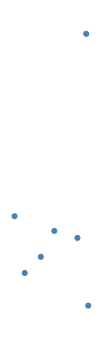

In [49]:
geoplot.pointplot(saikung)

# object ID #40
saikung_north = geopandas.GeoSeries([
    Point(saikung.iloc[6].Longitude, saikung.iloc[6].Latitude)
    ])

saikung_south = geopandas.GeoSeries([
    Point(saikung.iloc[3].Longitude, saikung.iloc[3].Latitude)
    ])

,OBJECTID,GMID,Dataset,Facility_Name,Address,數據集,設施名稱,地址,District,地區,...,電郵地址,Website,網頁,Remarks,備註,Northing,Easting,Latitude,Longitude,geometry
31,32,RVepZ4er5t,Community Halls & Community Centres,Wo Hing Community Hall,"G/F., No. 7 Wo Ming Lane, Fanling",社區會堂及社區中心,和興社區會堂,粉嶺和鳴里7號地下,NORTH,北區,...,N.A.,N.A.,N.A.,N.A.,N.A.,838401,832727,22.48517,114.14246,POINT Z (114.14246 22.48517 0.00000)
60,61,31zZbpRFRJ,Community Halls & Community Centres,Ta Kwu Ling Community Hall,"G/F, Ta Kwu Ling Rural Centre Government Build...",社區會堂及社區中心,打鼓嶺社區會堂,打鼓嶺坪輋路136號打鼓嶺鄉村中心政府大樓地下,NORTH,北區,...,N.A.,N.A.,N.A.,N.A.,N.A.,842767,834597,22.52460,114.16063,POINT Z (114.16063 22.52460 0.00000)
65,66,JUjMAlcNuk,Community Halls & Community Centres,Sha Tau Kok Community Hall,"55 Shun Hing Street, Sha Tau Kok",社區會堂及社區中心,沙頭角社區會堂,沙頭角順興街55號,NORTH,北區,...,N.A.,N.A.,N.A.,N.A.,N.A.,845150,840981,22.54611,114.22269,POINT Z (114.22269 22.54611 0.00000)
70,71,7Q2CFzjZjp,Community Halls & Community Centres,North District Community Centre (Only conferen...,"2 Lung Wan Street, Sheung Shui",社區會堂及社區中心,北區社區中心(只提供會議室及籃球場),上水龍運街2號,NORTH,北區,...,N.A.,N.A.,N.A.,N.A.,N.A.,840231,831320,22.50169,114.12879,POINT Z (114.12879 22.50169 0.00000)
74,75,OQrt5dLO4Y,Community Halls & Community Centres,Luen Wo Hui Community Hall,"G/F, 9 Wo Mun Street, Luen Wo Hui, Fanling",社區會堂及社區中心,聯和墟社區會堂,粉嶺聯和墟和滿街9號地下,NORTH,北區,...,N.A.,N.A.,N.A.,N.A.,N.A.,840085,833006,22.50038,114.14517,POINT Z (114.14517 22.50038 0.00000)
92,93,MI9S3BBqxK,Community Halls & Community Centres,Cheung Wah Community Hall,"Cheung Wah Estate, Fanling",社區會堂及社區中心,祥華社區會堂,粉嶺祥華邨,NORTH,北區,...,N.A.,N.A.,N.A.,N.A.,N.A.,839218,832646,22.49255,114.14168,POINT Z (114.14168 22.49255 0.00000)


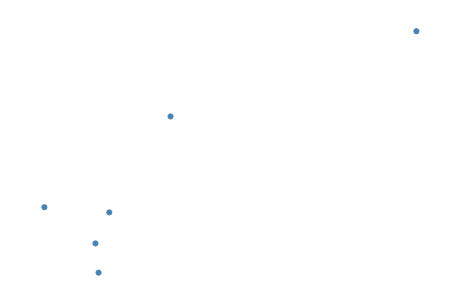

In [52]:
geoplot.pointplot(north)

# object ID #50

north

In [54]:
north_north = geopandas.GeoSeries([
    Point(north.iloc[2].Longitude, north.iloc[2].Latitude)
    ])

north_mid = geopandas.GeoSeries([
    Point(north.iloc[1].Longitude, saikung.iloc[1].Latitude)
    ])

north_mid = geopandas.GeoSeries([
    Point(north.iloc[5].Longitude, saikung.iloc[5].Latitude)
    ])


- blue areas
- within district boundary
- filtered blue areas
- population by district i.e. 8000
- 8000 points randomly generated in filted blue areas